In [1]:
from qiskit.quantum_info import SparsePauliOp

def pauli_operator():
    return SparsePauliOp.from_list(
        [
            ("II", -1.052373245772859),
            ("IZ", 0.39793742484318045),
            ("ZI", -0.39793742484318045),
            ("ZZ", -0.01128010425623538),
            ("XX", 0.18093119978423156),
        ]
    )

In [2]:
H2_op = pauli_operator()
print(H2_op)

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05237325+0.j,  0.39793742+0.j, -0.39793742+0.j, -0.0112801 +0.j,
  0.1809312 +0.j])


In [3]:
import numpy as np
min_eigen_exact = min(np.linalg.eigvals(H2_op.to_matrix()))

In [4]:
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Estimator
estimator = Estimator()
ansatz = EfficientSU2(2)

/tmp/ipykernel_12435/2605595654.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SPSA


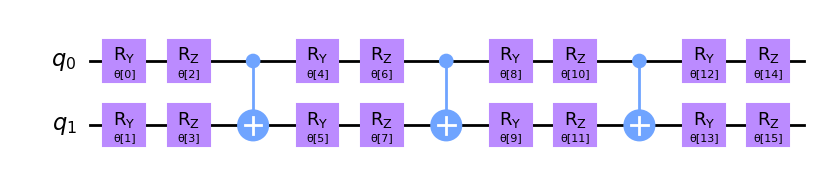

In [5]:
ansatz.decompose().draw('mpl')

In [6]:
callback = lambda nfev, prams, fval, step, acc: print(f'Evaluation {nfev}: {fval}')
optimizer = SPSA(callback=callback, maxiter = 1000)
cost_func = lambda params: estimator.run(ansatz, H2_op, parameter_values = params).result().values[0]
result = optimizer.minimize(cost_func, x0 = np.zeros(ansatz.num_parameters))

Evaluation 3: -0.7419651140062954
Evaluation 6: -1.3027032603319644
Evaluation 9: -0.9923681162372783
Evaluation 12: -1.3213472560460529
Evaluation 15: -1.2804566594365718
Evaluation 18: -1.3684599970500044
Evaluation 21: -1.3591860918170604
Evaluation 24: -1.5115185696141273
Evaluation 27: -1.265838204572933
Evaluation 30: -1.288948818597498
Evaluation 33: -1.2889149703720961
Evaluation 36: -1.3461053452092977
Evaluation 39: -1.0966699321079374
Evaluation 42: -1.097430627668079
Evaluation 45: -1.2411187438455855
Evaluation 48: -1.2666612281979586
Evaluation 51: -1.526446414178964
Evaluation 54: -1.5276414819469397
Evaluation 57: -1.4767908083318466
Evaluation 60: -1.4995113031493028
Evaluation 63: -1.5012739944597577
Evaluation 66: -1.3039058255123523
Evaluation 69: -1.5299144412244112
Evaluation 72: -1.5858378162053597
Evaluation 75: -1.6987324079513484
Evaluation 78: -1.697804883488652
Evaluation 81: -1.698139358716512
Evaluation 84: -1.6981463468800473
Evaluation 87: -1.42581501372

In [7]:
print(result)

{   'fun': -1.8572272896048647,
    'jac': None,
    'nfev': 3000,
    'nit': 1000,
    'njev': None,
    'x': array([-2.41731058,  1.91677861, -2.75114115,  6.22471635, -1.51029758,
       -5.62166112, -8.09468727, -0.44666736,  2.55172228,  2.68553103,
        1.27250083,  9.0965697 ,  1.0689937 ,  4.43524151,  1.07150847,
        4.38903046])}


In [8]:
print(min_eigen_exact)

(-1.8572750302023797+0j)


In [9]:
from qiskit_ibm_runtime import Options

options = Options()
options.execution.init_qubits = True
options.execution.shots = 5000

In [10]:
options.environment.callback = []
options.environment.job_tabs = []
options.environment.log_level = 'DEBUG'

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backend = service.get_backend('ibmq_qasm_simulator')

In [12]:
print(backend)

<IBMBackend('ibmq_qasm_simulator')>


In [ ]:
from qiskit_ibm_runtime import Estimator, Session

with Session(service=service, backend=backend) as session:
    estimator = Estimator(options=options)
    cost_func = lambda params: estimator.run(ansatz, H2_op, parameter_values=params).result().values[0]
    result = optimizer.minimize(cost_func, x0=np.zeros(ansatz.num_parameters))

runtime_job._stream_results:WARNING:2023-08-18 14:27:34,268: An error occurred while streaming results for job cjfhqp3ie1jj2il9mg50:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:27:37,952: An error occurred while streaming results for job cjfhqpv6dei0664lif20:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:27:41,844: An error occurred while streaming results for job cjf

Evaluation 3: -0.9920612431714186


runtime_job._stream_results:WARNING:2023-08-18 14:31:35,066: An error occurred while streaming results for job cjfhsl3ie1jj2il9p4v0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:31:38,218: An error occurred while streaming results for job cjfhsm57ui1f8qau8580:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:31:46,779: An error occurred while streaming results for job cjf

Evaluation 6: -1.081575547754758


runtime_job._stream_results:WARNING:2023-08-18 14:31:51,421: An error occurred while streaming results for job cjfhsp76dei0664lkv6g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:04,290: An error occurred while streaming results for job cjfhsq76dei0664ll0og:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:08,776: An error occurred while streaming results for job cjf

Evaluation 9: -0.877251968305325


runtime_job._stream_results:WARNING:2023-08-18 14:32:12,891: An error occurred while streaming results for job cjfhsunbq0tlksv8fbjg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:16,312: An error occurred while streaming results for job cjfhsvn6dei0664ll760:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:19,806: An error occurred while streaming results for job cjf

Evaluation 12: -0.9785801703984096


runtime_job._stream_results:WARNING:2023-08-18 14:32:23,428: An error occurred while streaming results for job cjfht1bie1jj2il9pk3g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:30,182: An error occurred while streaming results for job cjfht37bq0tlksv8figg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable



Evaluation 15: -0.7563231741270935


runtime_job._stream_results:WARNING:2023-08-18 14:32:34,087: An error occurred while streaming results for job cjfht3v6dei0664lleb0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:37,412: An error occurred while streaming results for job cjfht4rie1jj2il9pp20:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:41,666: An error occurred while streaming results for job cjf

Evaluation 18: -1.243638062205231


runtime_job._stream_results:WARNING:2023-08-18 14:32:48,833: An error occurred while streaming results for job cjfht7d7ui1f8qau8rh0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:52,520: An error occurred while streaming results for job cjfht8k5hqba8918gk6g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:32:56,066: An error occurred while streaming results for job cjf

Evaluation 21: -1.136809719334607


runtime_job._stream_results:WARNING:2023-08-18 14:33:01,736: An error occurred while streaming results for job cjfhtat7ui1f8qau8ur0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:05,525: An error occurred while streaming results for job cjfhtbv6dei0664llob0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:11,775: An error occurred while streaming results for job cjf

Evaluation 24: -1.035576124430297


runtime_job._stream_results:WARNING:2023-08-18 14:33:15,253: An error occurred while streaming results for job cjfhtefbq0tlksv8fvig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:22,425: An error occurred while streaming results for job cjfhtg0cs414jvgqcc7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:26,209: An error occurred while streaming results for job cjf

Evaluation 27: -0.6774407340585422


runtime_job._stream_results:WARNING:2023-08-18 14:33:29,574: An error occurred while streaming results for job cjfhthvbq0tlksv8g410:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:36,863: An error occurred while streaming results for job cjfhtjnbq0tlksv8g5j0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:45,144: An error occurred while streaming results for job cjf

Evaluation 30: -0.7183259301167748


runtime_job._stream_results:WARNING:2023-08-18 14:33:48,519: An error occurred while streaming results for job cjfhtmgcs414jvgqcij0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:52,219: An error occurred while streaming results for job cjfhtnf6dei0664lm62g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:33:55,803: An error occurred while streaming results for job cjf

Evaluation 33: -0.7201429242975672


runtime_job._stream_results:WARNING:2023-08-18 14:34:00,206: An error occurred while streaming results for job cjfhtpd7ui1f8qau9df0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:34:09,524: An error occurred while streaming results for job cjfhtrrie1jj2il9qlpg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:34:16,078: An error occurred while streaming results for job cjf

Evaluation 36: -1.2989421048419938


runtime_job._stream_results:WARNING:2023-08-18 14:34:29,389: An error occurred while streaming results for job cjfhtuc5hqba8918hcd0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:34:36,865: An error occurred while streaming results for job cjfhu28cs414jvgqcucg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:34:40,551: An error occurred while streaming results for job cjf

Evaluation 39: -1.3044783340039259


runtime_job._stream_results:WARNING:2023-08-18 14:34:44,225: An error occurred while streaming results for job cjfhu4l7ui1f8qau9omg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:34:47,924: An error occurred while streaming results for job cjfhu58cs414jvgqd16g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:34:56,678: An error occurred while streaming results for job cjf

Evaluation 42: -1.2157193654987872


runtime_job._stream_results:WARNING:2023-08-18 14:35:05,638: An error occurred while streaming results for job cjfhu9v6dei0664lmp90:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:09,120: An error occurred while streaming results for job cjfhuav6dei0664lmq4g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:12,602: An error occurred while streaming results for job cjf

Evaluation 45: -1.2628493457823873


runtime_job._stream_results:WARNING:2023-08-18 14:35:15,982: An error occurred while streaming results for job cjfhuc8cs414jvgqd78g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:19,770: An error occurred while streaming results for job cjfhudd7ui1f8qaua1s0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:23,763: An error occurred while streaming results for job cjf

Evaluation 48: -0.9888930017077638


runtime_job._stream_results:WARNING:2023-08-18 14:35:26,835: An error occurred while streaming results for job cjfhuff6dei0664ln010:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:32,263: An error occurred while streaming results for job cjfhuggcs414jvgqdchg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:40,454: An error occurred while streaming results for job cjf

Evaluation 51: -0.9826821157074522


runtime_job._stream_results:WARNING:2023-08-18 14:35:43,602: An error occurred while streaming results for job cjfhuj8cs414jvgqdf4g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:49,670: An error occurred while streaming results for job cjfhuks5hqba8918i2u0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:35:53,561: An error occurred while streaming results for job cjf

Evaluation 54: -0.9733711537959409


runtime_job._stream_results:WARNING:2023-08-18 14:35:57,479: An error occurred while streaming results for job cjfhumocs414jvgqdhk0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:01,651: An error occurred while streaming results for job cjfhunv6dei0664ln940:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:09,535: An error occurred while streaming results for job cjf

Evaluation 57: -1.476492956403708


runtime_job._stream_results:WARNING:2023-08-18 14:36:13,632: An error occurred while streaming results for job cjfhuqnbq0tlksv8hik0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:17,524: An error occurred while streaming results for job cjfhurv6dei0664lndo0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:21,110: An error occurred while streaming results for job cjf

Evaluation 60: -1.5097004699794079


runtime_job._stream_results:WARNING:2023-08-18 14:36:24,695: An error occurred while streaming results for job cjfhutjie1jj2il9rrh0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:27,871: An error occurred while streaming results for job cjfhuuk5hqba8918icm0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:31,457: An error occurred while streaming results for job cjf

Evaluation 63: -0.8947105010884662


runtime_job._stream_results:WARNING:2023-08-18 14:36:34,838: An error occurred while streaming results for job cjfhv03ie1jj2il9rvc0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:38,730: An error occurred while streaming results for job cjfhv176dei0664lnl3g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:45,497: An error occurred while streaming results for job cjf

Evaluation 66: -0.9623545092781198


runtime_job._stream_results:WARNING:2023-08-18 14:36:49,590: An error occurred while streaming results for job cjfhv3k5hqba8918ijbg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:36:57,653: An error occurred while streaming results for job cjfhv4jie1jj2il9s3n0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:37:01,881: An error occurred while streaming results for job cjf

Evaluation 69: -1.066878333331182


runtime_job._stream_results:WARNING:2023-08-18 14:37:06,903: An error occurred while streaming results for job cjfhv7rie1jj2il9s8vg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:37:10,284: An error occurred while streaming results for job cjfhv957ui1f8qaub250:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:37:24,317: An error occurred while streaming results for job cjf

Evaluation 72: -1.1655908436256006


runtime_job._stream_results:WARNING:2023-08-18 14:37:28,619: An error occurred while streaming results for job cjfhvdgcs414jvgqebf0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:37:32,514: An error occurred while streaming results for job cjfhvek5hqba8918j160:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:37:41,423: An error occurred while streaming results for job cjf

Evaluation 75: -1.1667886549905229


runtime_job._stream_results:WARNING:2023-08-18 14:37:45,623: An error occurred while streaming results for job cjfhvhgcs414jvgqegjg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:37:51,163: An error occurred while streaming results for job cjfhvinbq0tlksv8ihb0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:37:54,648: An error occurred while streaming results for job cjf

Evaluation 78: -1.1721732689422844


runtime_job._stream_results:WARNING:2023-08-18 14:38:01,297: An error occurred while streaming results for job cjfhvlrie1jj2il9sqag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:04,675: An error occurred while streaming results for job cjfhvmn6dei0664lof2g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:08,100: An error occurred while streaming results for job cjf

Evaluation 81: -1.1739879494285075


runtime_job._stream_results:WARNING:2023-08-18 14:38:11,739: An error occurred while streaming results for job cjfhvoc5hqba8918jbc0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:15,525: An error occurred while streaming results for job cjfhvpbie1jj2il9sv2g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:23,610: An error occurred while streaming results for job cjf

Evaluation 84: -1.3014594551407261


runtime_job._stream_results:WARNING:2023-08-18 14:38:35,196: An error occurred while streaming results for job cjfhvubie1jj2il9t4c0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:38,681: An error occurred while streaming results for job cjfhvv45hqba8918jjjg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:42,366: An error occurred while streaming results for job cjf

Evaluation 87: -1.3049120961112046


runtime_job._stream_results:WARNING:2023-08-18 14:38:46,009: An error occurred while streaming results for job cjfi00s5hqba8918jmgg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:49,641: An error occurred while streaming results for job cjfi01rie1jj2il9t9pg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:53,325: An error occurred while streaming results for job cjf

Evaluation 90: -1.2937615041316728


runtime_job._stream_results:WARNING:2023-08-18 14:38:56,704: An error occurred while streaming results for job cjfi03jie1jj2il9tc0g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:38:59,894: An error occurred while streaming results for job cjfi04f6dei0664louqg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:39:08,596: An error occurred while streaming results for job cjf

Evaluation 93: -1.3156373301047732


runtime_job._stream_results:WARNING:2023-08-18 14:39:12,172: An error occurred while streaming results for job cjfi078cs414jvgqf9p0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:39:19,549: An error occurred while streaming results for job cjfi09f6dei0664lp4d0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:39:35,198: An error occurred while streaming results for job cjf

Evaluation 96: -1.4052848351397305


runtime_job._stream_results:WARNING:2023-08-18 14:39:39,545: An error occurred while streaming results for job cjfi0e45hqba8918k6s0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:39:43,509: An error occurred while streaming results for job cjfi0f57ui1f8qauc8g0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:39:49,961: An error occurred while streaming results for job cjf

Evaluation 99: -1.3769582968153584


runtime_job._stream_results:WARNING:2023-08-18 14:39:53,546: An error occurred while streaming results for job cjfi0hocs414jvgqfl2g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:39:58,154: An error occurred while streaming results for job cjfi0irie1jj2il9tv8g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:40:01,588: An error occurred while streaming results for job cjf

Evaluation 102: -1.3897555170330962


runtime_job._stream_results:WARNING:2023-08-18 14:40:07,066: An error occurred while streaming results for job cjfi0l7bq0tlksv8jobg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:40:11,058: An error occurred while streaming results for job cjfi0m76dei0664lpg9g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:40:19,530: An error occurred while streaming results for job cjf

Evaluation 105: -1.3900063235434166


runtime_job._stream_results:WARNING:2023-08-18 14:40:27,956: An error occurred while streaming results for job cjfi0qd7ui1f8qauciqg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:40:31,541: An error occurred while streaming results for job cjfi0rfbq0tlksv8jvg0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:40:39,017: An error occurred while streaming results for job cjf

Evaluation 108: -1.572180172829861


runtime_job._stream_results:WARNING:2023-08-18 14:40:42,704: An error occurred while streaming results for job cjfi0u45hqba8918ko7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:40:46,699: An error occurred while streaming results for job cjfi0urie1jj2il9uelg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:40:50,282: An error occurred while streaming results for job cjf

Evaluation 111: -1.5920706091555559


runtime_job._stream_results:WARNING:2023-08-18 14:40:53,720: An error occurred while streaming results for job cjfi10t7ui1f8qaucp70:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:41:03,084: An error occurred while streaming results for job cjfi130cs414jvgqg860:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:41:11,646: An error occurred while streaming results for job cjf

Evaluation 114: -1.597736670970153


runtime_job._stream_results:WARNING:2023-08-18 14:41:19,674: An error occurred while streaming results for job cjfi177bq0tlksv8kb7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:41:28,482: An error occurred while streaming results for job cjfi19gcs414jvgqgdvg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:41:32,583: An error occurred while streaming results for job cjf

Evaluation 117: -1.4669191657069895


runtime_job._stream_results:WARNING:2023-08-18 14:41:40,156: An error occurred while streaming results for job cjfi1cbie1jj2il9utq0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:41:48,554: An error occurred while streaming results for job cjfi1ejie1jj2il9v0k0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:41:53,059: An error occurred while streaming results for job cjf

Evaluation 120: -1.6052566443142513


runtime_job._stream_results:WARNING:2023-08-18 14:41:57,566: An error occurred while streaming results for job cjfi1gjie1jj2il9v3rg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:42:09,753: An error occurred while streaming results for job cjfi1hgcs414jvgqgnu0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:42:18,969: An error occurred while streaming results for job cjf

Evaluation 123: -1.6299693260517698


runtime_job._stream_results:WARNING:2023-08-18 14:42:22,143: An error occurred while streaming results for job cjfi1n3ie1jj2il9vbng:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:42:26,548: An error occurred while streaming results for job cjfi1nrie1jj2il9vck0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:42:30,757: An error occurred while streaming results for job cjf

Evaluation 126: -1.7669096186037365


runtime_job._stream_results:WARNING:2023-08-18 14:42:34,276: An error occurred while streaming results for job cjfi1q57ui1f8qaudhig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:42:43,035: An error occurred while streaming results for job cjfi1rvbq0tlksv8l2j0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:42:48,053: An error occurred while streaming results for job cjf

Evaluation 129: -1.7612073752221384


runtime_job._stream_results:WARNING:2023-08-18 14:42:52,149: An error occurred while streaming results for job cjfi1ud7ui1f8qaudlog:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:42:55,562: An error occurred while streaming results for job cjfi1v8cs414jvgqh5hg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:02,082: An error occurred while streaming results for job cjf

Evaluation 132: -1.7666963292474236


runtime_job._stream_results:WARNING:2023-08-18 14:43:05,871: An error occurred while streaming results for job cjfi21s5hqba8918m230:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:10,275: An error occurred while streaming results for job cjfi22t7ui1f8qaudpr0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:14,269: An error occurred while streaming results for job cjf

Evaluation 135: -1.752227093660316


runtime_job._stream_results:WARNING:2023-08-18 14:43:17,853: An error occurred while streaming results for job cjfi24vbq0tlksv8larg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:21,028: An error occurred while streaming results for job cjfi25s5hqba8918m550:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:29,637: An error occurred while streaming results for job cjf

Evaluation 138: -1.7229240110034074


runtime_job._stream_results:WARNING:2023-08-18 14:43:33,010: An error occurred while streaming results for job cjfi28jie1jj2il9vtkg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:44,387: An error occurred while streaming results for job cjfi2bk5hqba8918ma3g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:47,756: An error occurred while streaming results for job cjf

Evaluation 141: -1.7379481944491433


runtime_job._stream_results:WARNING:2023-08-18 14:43:51,720: An error occurred while streaming results for job cjfi2d76dei0664lr6mg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:55,820: An error occurred while streaming results for job cjfi2e3ie1jj2ila03g0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:43:59,278: An error occurred while streaming results for job cjf

Evaluation 144: -1.6730797247340794


runtime_job._stream_results:WARNING:2023-08-18 14:44:02,913: An error occurred while streaming results for job cjfi2g0cs414jvgqhlv0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:06,732: An error occurred while streaming results for job cjfi2h57ui1f8qaue6n0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:10,273: An error occurred while streaming results for job cjf

Evaluation 147: -1.725937788570184


runtime_job._stream_results:WARNING:2023-08-18 14:44:13,768: An error occurred while streaming results for job cjfi2iocs414jvgqhpn0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:17,353: An error occurred while streaming results for job cjfi2jrie1jj2ila0a80:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:21,600: An error occurred while streaming results for job cjf

Evaluation 150: -1.7657844293688516


runtime_job._stream_results:WARNING:2023-08-18 14:44:30,357: An error occurred while streaming results for job cjfi2lrie1jj2ila0cvg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:33,942: An error occurred while streaming results for job cjfi2nv6dei0664lri3g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:41,520: An error occurred while streaming results for job cjf

Evaluation 153: -1.7759633226121272


runtime_job._stream_results:WARNING:2023-08-18 14:44:45,104: An error occurred while streaming results for job cjfi2qk5hqba8918mu8g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:51,409: An error occurred while streaming results for job cjfi2s8cs414jvgqi6o0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:44:58,825: An error occurred while streaming results for job cjf

Evaluation 156: -1.7506371943832975


runtime_job._stream_results:WARNING:2023-08-18 14:45:03,433: An error occurred while streaming results for job cjfi2v7bq0tlksv8m77g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:14,082: An error occurred while streaming results for job cjfi318cs414jvgqibj0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:18,690: An error occurred while streaming results for job cjf

Evaluation 159: -1.744061913070885


runtime_job._stream_results:WARNING:2023-08-18 14:45:22,791: An error occurred while streaming results for job cjfi33rie1jj2ila0u5g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:26,164: An error occurred while streaming results for job cjfi353ie1jj2ila0v9g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:32,012: An error occurred while streaming results for job cjf

Evaluation 162: -1.743774062303021


runtime_job._stream_results:WARNING:2023-08-18 14:45:35,628: An error occurred while streaming results for job cjfi37bie1jj2ila13m0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:39,446: An error occurred while streaming results for job cjfi388cs414jvgqikog:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:43,162: An error occurred while streaming results for job cjf

Evaluation 165: -1.7409423275227627


runtime_job._stream_results:WARNING:2023-08-18 14:45:46,439: An error occurred while streaming results for job cjfi3a76dei0664ls6hg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:51,047: An error occurred while streaming results for job cjfi3b76dei0664ls7q0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:45:54,118: An error occurred while streaming results for job cjf

Evaluation 168: -1.7606691193839241


runtime_job._stream_results:WARNING:2023-08-18 14:45:57,497: An error occurred while streaming results for job cjfi3cs5hqba8918nji0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:01,321: An error occurred while streaming results for job cjfi3djie1jj2ila19sg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:04,768: An error occurred while streaming results for job cjf

Evaluation 171: -1.7687681392480579


runtime_job._stream_results:WARNING:2023-08-18 14:46:08,593: An error occurred while streaming results for job cjfi3fgcs414jvgqirr0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:11,823: An error occurred while streaming results for job cjfi3gd7ui1f8qauf9ng:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:15,929: An error occurred while streaming results for job cjf

Evaluation 174: -1.831912968492397


runtime_job._stream_results:WARNING:2023-08-18 14:46:23,507: An error occurred while streaming results for job cjfi3j8cs414jvgqivgg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:26,987: An error occurred while streaming results for job cjfi3k57ui1f8qaufem0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:30,935: An error occurred while streaming results for job cjf

Evaluation 177: -1.835731735458689


runtime_job._stream_results:WARNING:2023-08-18 14:46:34,673: An error occurred while streaming results for job cjfi3m0cs414jvgqj46g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:41,733: An error occurred while streaming results for job cjfi3nt7ui1f8qaufje0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:46:45,839: An error occurred while streaming results for job cjf

Evaluation 180: -1.8362680967233072


runtime_job._stream_results:WARNING:2023-08-18 14:46:58,731: An error occurred while streaming results for job cjfi3pt7ui1f8qaufmb0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:13,169: An error occurred while streaming results for job cjfi3vc5hqba8918oai0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:16,348: An error occurred while streaming results for job cjf

Evaluation 183: -1.8247881878647516


runtime_job._stream_results:WARNING:2023-08-18 14:47:20,749: An error occurred while streaming results for job cjfi418cs414jvgqjj7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:24,900: An error occurred while streaming results for job cjfi428cs414jvgqjks0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:28,734: An error occurred while streaming results for job cjf

Evaluation 186: -1.8244815228255624


runtime_job._stream_results:WARNING:2023-08-18 14:47:32,215: An error occurred while streaming results for job cjfi44gcs414jvgqjmtg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:36,311: An error occurred while streaming results for job cjfi45bie1jj2ila26r0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:40,919: An error occurred while streaming results for job cjf

Evaluation 189: -1.8312199683817751


runtime_job._stream_results:WARNING:2023-08-18 14:47:44,852: An error occurred while streaming results for job cjfi47l7ui1f8qaug5h0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:49,111: An error occurred while streaming results for job cjfi48k5hqba8918ol7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:47:52,191: An error occurred while streaming results for job cjf

Evaluation 192: -1.8276845245518687


runtime_job._stream_results:WARNING:2023-08-18 14:47:57,667: An error occurred while streaming results for job cjfi4ad7ui1f8qaug8sg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:01,714: An error occurred while streaming results for job cjfi4bnbq0tlksv8nq60:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:08,976: An error occurred while streaming results for job cjf

Evaluation 195: -1.8349123077686496


runtime_job._stream_results:WARNING:2023-08-18 14:48:12,533: An error occurred while streaming results for job cjfi4el7ui1f8qaugdh0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:19,786: An error occurred while streaming results for job cjfi4g8cs414jvgqk4og:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:23,085: An error occurred while streaming results for job cjf

Evaluation 198: -1.8362276078629653


runtime_job._stream_results:WARNING:2023-08-18 14:48:26,605: An error occurred while streaming results for job cjfi4i76dei0664ltimg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:30,433: An error occurred while streaming results for job cjfi4irie1jj2ila2m8g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:34,344: An error occurred while streaming results for job cjf

Evaluation 201: -1.8303312053246312


runtime_job._stream_results:WARNING:2023-08-18 14:48:38,338: An error occurred while streaming results for job cjfi4kt7ui1f8qaughsg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:47,787: An error occurred while streaming results for job cjfi4n76dei0664ltnm0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:48:53,624: An error occurred while streaming results for job cjf

Evaluation 204: -1.841583971693109


runtime_job._stream_results:WARNING:2023-08-18 14:48:59,562: An error occurred while streaming results for job cjfi4q0cs414jvgqkfl0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:03,044: An error occurred while streaming results for job cjfi4r7bq0tlksv8o8p0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:06,013: An error occurred while streaming results for job cjf

Evaluation 207: -1.839280451308885


runtime_job._stream_results:WARNING:2023-08-18 14:49:15,005: An error occurred while streaming results for job cjfi4u8cs414jvgqkjvg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:18,506: An error occurred while streaming results for job cjfi4v45hqba8918pe1g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:21,884: An error occurred while streaming results for job cjf

Evaluation 210: -1.839392054971245


runtime_job._stream_results:WARNING:2023-08-18 14:49:26,289: An error occurred while streaming results for job cjfi50vbq0tlksv8oei0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:30,077: An error occurred while streaming results for job cjfi51rie1jj2ila38fg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:36,323: An error occurred while streaming results for job cjf

Evaluation 213: -1.8403815848320668


runtime_job._stream_results:WARNING:2023-08-18 14:49:40,727: An error occurred while streaming results for job cjfi54f6dei0664lu67g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:46,462: An error occurred while streaming results for job cjfi563ie1jj2ila3dag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:49:50,044: An error occurred while streaming results for job cjf

Evaluation 216: -1.833702072425441


runtime_job._stream_results:WARNING:2023-08-18 14:49:56,600: An error occurred while streaming results for job cjfi58l7ui1f8qauh760:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:09,808: An error occurred while streaming results for job cjfi59gcs414jvgql0b0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:13,598: An error occurred while streaming results for job cjf

Evaluation 219: -1.8314971922872694


runtime_job._stream_results:WARNING:2023-08-18 14:50:17,233: An error occurred while streaming results for job cjfi5dgcs414jvgql67g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:20,708: An error occurred while streaming results for job cjfi5ejie1jj2ila3oa0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:24,453: An error occurred while streaming results for job cjf

Evaluation 222: -1.8365439777175252


runtime_job._stream_results:WARNING:2023-08-18 14:50:33,157: An error occurred while streaming results for job cjfi5hn6dei0664lum70:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:36,219: An error occurred while streaming results for job cjfi5in6dei0664luo10:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:40,376: An error occurred while streaming results for job cjf

Evaluation 225: -1.8375659556412125


runtime_job._stream_results:WARNING:2023-08-18 14:50:43,762: An error occurred while streaming results for job cjfi5kc5hqba8918qah0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:48,312: An error occurred while streaming results for job cjfi5lc5hqba8918qbc0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:50:54,455: An error occurred while streaming results for job cjf

Evaluation 228: -1.8328310841539617


runtime_job._stream_results:WARNING:2023-08-18 14:50:58,141: An error occurred while streaming results for job cjfi5nt7ui1f8qauht70:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:02,443: An error occurred while streaming results for job cjfi5orie1jj2ila459g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:06,130: An error occurred while streaming results for job cjf

Evaluation 231: -1.84137193066878


runtime_job._stream_results:WARNING:2023-08-18 14:51:09,590: An error occurred while streaming results for job cjfi5qt7ui1f8qaui0eg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:13,416: An error occurred while streaming results for job cjfi5rnbq0tlksv8piig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:16,987: An error occurred while streaming results for job cjf

Evaluation 234: -1.8397121147720132


runtime_job._stream_results:WARNING:2023-08-18 14:51:20,476: An error occurred while streaming results for job cjfi5tgcs414jvgqlqig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:28,966: An error occurred while streaming results for job cjfi5vjie1jj2ila4cb0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:33,068: An error occurred while streaming results for job cjf

Evaluation 237: -1.8441488110438247


runtime_job._stream_results:WARNING:2023-08-18 14:51:37,259: An error occurred while streaming results for job cjfi61nbq0tlksv8pqfg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:41,355: An error occurred while streaming results for job cjfi62n6dei0664lvdg0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:44,368: An error occurred while streaming results for job cjf

Evaluation 240: -1.8414179793219914


runtime_job._stream_results:WARNING:2023-08-18 14:51:47,909: An error occurred while streaming results for job cjfi64f6dei0664lvfog:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:52,438: An error occurred while streaming results for job cjfi65d7ui1f8qauidhg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:51:57,396: An error occurred while streaming results for job cjf

Evaluation 243: -1.8363937083268334


runtime_job._stream_results:WARNING:2023-08-18 14:52:01,631: An error occurred while streaming results for job cjfi67k5hqba8918r1l0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:05,157: An error occurred while streaming results for job cjfi68v6dei0664lvlr0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:09,004: An error occurred while streaming results for job cjf

Evaluation 246: -1.8331556964672198


runtime_job._stream_results:WARNING:2023-08-18 14:52:12,188: An error occurred while streaming results for job cjfi6al7ui1f8qauik20:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:15,763: An error occurred while streaming results for job cjfi6bc5hqba8918r7j0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:19,505: An error occurred while streaming results for job cjf

Evaluation 249: -1.8439668928959771


runtime_job._stream_results:WARNING:2023-08-18 14:52:27,641: An error occurred while streaming results for job cjfi6ef6dei0664lvsig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:30,919: An error occurred while streaming results for job cjfi6f76dei0664lvu2g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:34,707: An error occurred while streaming results for job cjf

Evaluation 252: -1.8522462364640846


runtime_job._stream_results:WARNING:2023-08-18 14:52:37,735: An error occurred while streaming results for job cjfi6gocs414jvgqmjo0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:41,320: An error occurred while streaming results for job cjfi6hgcs414jvgqmkfg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:52:58,464: An error occurred while streaming results for job cjf

Evaluation 255: -1.8494059266266953


runtime_job._stream_results:WARNING:2023-08-18 14:53:03,277: An error occurred while streaming results for job cjfi6mt7ui1f8qauj18g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:07,168: An error occurred while streaming results for job cjfi6o3ie1jj2ila5dm0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:10,755: An error occurred while streaming results for job cjf

Evaluation 258: -1.8390138261037636


runtime_job._stream_results:WARNING:2023-08-18 14:53:14,121: An error occurred while streaming results for job cjfi6pvbq0tlksv8qop0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:19,867: An error occurred while streaming results for job cjfi6rbie1jj2ila5htg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:23,383: An error occurred while streaming results for job cjf

Evaluation 261: -1.839483451579628


runtime_job._stream_results:WARNING:2023-08-18 14:53:26,625: An error occurred while streaming results for job cjfi6t57ui1f8qauj9g0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:31,195: An error occurred while streaming results for job cjfi6tocs414jvgqn380:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:36,457: An error occurred while streaming results for job cjf

Evaluation 264: -1.837155381625249


runtime_job._stream_results:WARNING:2023-08-18 14:53:40,962: An error occurred while streaming results for job cjfi70f6dei0664m0heg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:44,009: An error occurred while streaming results for job cjfi71nbq0tlksv8qvi0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:48,540: An error occurred while streaming results for job cjf

Evaluation 267: -1.8384923095939298


runtime_job._stream_results:WARNING:2023-08-18 14:53:52,841: An error occurred while streaming results for job cjfi73c5hqba8918s2m0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:56,219: An error occurred while streaming results for job cjfi74c5hqba8918s3k0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:53:59,806: An error occurred while streaming results for job cjf

Evaluation 270: -1.8362517052501217


runtime_job._stream_results:WARNING:2023-08-18 14:54:05,246: An error occurred while streaming results for job cjfi76d7ui1f8qaujjvg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:54:08,813: An error occurred while streaming results for job cjfi77gcs414jvgqne80:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:54:17,269: An error occurred while streaming results for job cjf

Evaluation 273: -1.8340009220593974


runtime_job._stream_results:WARNING:2023-08-18 14:54:21,228: An error occurred while streaming results for job cjfi7ak5hqba8918sct0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:54:26,224: An error occurred while streaming results for job cjfi7c0cs414jvgqnisg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:54:31,037: An error occurred while streaming results for job cjf

Evaluation 276: -1.8530254361722918


runtime_job._stream_results:WARNING:2023-08-18 14:54:36,464: An error occurred while streaming results for job cjfi7e45hqba8918sge0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:54:47,318: An error occurred while streaming results for job cjfi7hc5hqba8918sje0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:54:51,383: An error occurred while streaming results for job cjf

Evaluation 279: -1.8445154214279174


runtime_job._stream_results:WARNING:2023-08-18 14:54:54,794: An error occurred while streaming results for job cjfi7j57ui1f8qauk3rg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:54:59,206: An error occurred while streaming results for job cjfi7k76dei0664m18pg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:55:03,277: An error occurred while streaming results for job cjf

Evaluation 282: -1.8421952851890857


runtime_job._stream_results:WARNING:2023-08-18 14:55:08,823: An error occurred while streaming results for job cjfi7m7bq0tlksv8ro90:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:55:15,304: An error occurred while streaming results for job cjfi7o8cs414jvgqo15g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:55:21,792: An error occurred while streaming results for job cjf

Evaluation 285: -1.8474629340658542


runtime_job._stream_results:WARNING:2023-08-18 14:55:25,466: An error occurred while streaming results for job cjfi7qrie1jj2ila6lh0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:55:37,605: An error occurred while streaming results for job cjfi7srie1jj2ila6njg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:55:45,206: An error occurred while streaming results for job cjf

Evaluation 288: -1.8447971230935147


runtime_job._stream_results:WARNING:2023-08-18 14:55:52,906: An error occurred while streaming results for job cjfi81bie1jj2ila6rfg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:55:56,657: An error occurred while streaming results for job cjfi82gcs414jvgqoceg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:02,175: An error occurred while streaming results for job cjf

Evaluation 291: -1.8507307808965257


runtime_job._stream_results:WARNING:2023-08-18 14:56:08,524: An error occurred while streaming results for job cjfi850cs414jvgqogdg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:12,108: An error occurred while streaming results for job cjfi86l7ui1f8qaukoi0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:17,884: An error occurred while streaming results for job cjf

Evaluation 294: -1.8450611487202853


runtime_job._stream_results:WARNING:2023-08-18 14:56:20,915: An error occurred while streaming results for job cjfi88rie1jj2ila74lg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:24,615: An error occurred while streaming results for job cjfi89nbq0tlksv8sbq0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:27,922: An error occurred while streaming results for job cjf

Evaluation 297: -1.8486035035894286


runtime_job._stream_results:WARNING:2023-08-18 14:56:31,437: An error occurred while streaming results for job cjfi8bfbq0tlksv8se7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:35,763: An error occurred while streaming results for job cjfi8c0cs414jvgqoof0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:42,318: An error occurred while streaming results for job cjf

Evaluation 300: -1.8439123243745454


runtime_job._stream_results:WARNING:2023-08-18 14:56:46,047: An error occurred while streaming results for job cjfi8eocs414jvgqoqlg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:50,511: An error occurred while streaming results for job cjfi8focs414jvgqorf0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:56:54,329: An error occurred while streaming results for job cjf

Evaluation 303: -1.8362646282652264


runtime_job._stream_results:WARNING:2023-08-18 14:57:02,388: An error occurred while streaming results for job cjfi8iv6dei0664m27d0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:57:08,021: An error occurred while streaming results for job cjfi8kf6dei0664m28cg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:57:11,373: An error occurred while streaming results for job cjf

Evaluation 306: -1.844402336717061


runtime_job._stream_results:WARNING:2023-08-18 14:57:14,983: An error occurred while streaming results for job cjfi8m76dei0664m2ao0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:57:25,706: An error occurred while streaming results for job cjfi8ov6dei0664m2cq0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:57:29,013: An error occurred while streaming results for job cjf

Evaluation 309: -1.8391687540780532


runtime_job._stream_results:WARNING:2023-08-18 14:57:37,423: An error occurred while streaming results for job cjfi8rn6dei0664m2eug:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:57:41,094: An error occurred while streaming results for job cjfi8sgcs414jvgqp800:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:57:46,422: An error occurred while streaming results for job cjf

Evaluation 312: -1.83749810549015


runtime_job._stream_results:WARNING:2023-08-18 14:57:54,812: An error occurred while streaming results for job cjfi900cs414jvgqpbt0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:05,162: An error occurred while streaming results for job cjfi927bq0tlksv8t4sg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:10,180: An error occurred while streaming results for job cjf

Evaluation 315: -1.8464488171269693


runtime_job._stream_results:WARNING:2023-08-18 14:58:14,070: An error occurred while streaming results for job cjfi94t7ui1f8qaulok0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:21,131: An error occurred while streaming results for job cjfi96gcs414jvgqpk50:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:25,745: An error occurred while streaming results for job cjf

Evaluation 318: -1.8475026142745743


runtime_job._stream_results:WARNING:2023-08-18 14:58:29,124: An error occurred while streaming results for job cjfi98v6dei0664m2te0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:32,913: An error occurred while streaming results for job cjfi99jie1jj2ila86s0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:36,497: An error occurred while streaming results for job cjf

Evaluation 321: -1.8522138050714005


runtime_job._stream_results:WARNING:2023-08-18 14:58:39,675: An error occurred while streaming results for job cjfi9bf6dei0664m318g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:46,839: An error occurred while streaming results for job cjfi9cs5hqba8918umo0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:58:54,111: An error occurred while streaming results for job cjf

Evaluation 324: -1.8498710826775477


runtime_job._stream_results:WARNING:2023-08-18 14:59:02,201: An error occurred while streaming results for job cjfi9gt7ui1f8qaum3sg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:59:07,730: An error occurred while streaming results for job cjfi9hvbq0tlksv8tm70:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:59:13,254: An error occurred while streaming results for job cjf

Evaluation 327: -1.8561629296041005


runtime_job._stream_results:WARNING:2023-08-18 14:59:16,839: An error occurred while streaming results for job cjfi9kjie1jj2ila8iq0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:59:24,115: An error occurred while streaming results for job cjfi9md7ui1f8qaum8g0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:59:30,927: An error occurred while streaming results for job cjf

Evaluation 330: -1.8577634383408235


runtime_job._stream_results:WARNING:2023-08-18 14:59:34,662: An error occurred while streaming results for job cjfi9p7bq0tlksv8tt00:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:59:39,479: An error occurred while streaming results for job cjfi9q8cs414jvgqq6s0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 14:59:44,850: An error occurred while streaming results for job cjf

Evaluation 333: -1.8494552514226776


runtime_job._stream_results:WARNING:2023-08-18 14:59:47,974: An error occurred while streaming results for job cjfi9sgcs414jvgqq93g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:00:59,043: An error occurred while streaming results for job cjfiae3ie1jj2ila9ju0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable



Evaluation 336: -1.8567700553913014


runtime_job._stream_results:WARNING:2023-08-18 15:01:02,044: An error occurred while streaming results for job cjfiaf45hqba8918vsjg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:06,313: An error occurred while streaming results for job cjfiafvbq0tlksv8ura0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:11,229: An error occurred while streaming results for job cjf

Evaluation 339: -1.8568622721431205


runtime_job._stream_results:WARNING:2023-08-18 15:01:15,427: An error occurred while streaming results for job cjfiai57ui1f8qaun7i0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:18,783: An error occurred while streaming results for job cjfiaj3ie1jj2ila9ps0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:23,209: An error occurred while streaming results for job cjf

Evaluation 342: -1.8486137561779112


runtime_job._stream_results:WARNING:2023-08-18 15:01:29,181: An error occurred while streaming results for job cjfialgcs414jvgqr72g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:32,939: An error occurred while streaming results for job cjfiamn6dei0664m4i2g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:40,967: An error occurred while streaming results for job cjf

Evaluation 345: -1.8614753361158223


runtime_job._stream_results:WARNING:2023-08-18 15:01:44,415: An error occurred while streaming results for job cjfiapl7ui1f8qaundog:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:48,197: An error occurred while streaming results for job cjfiaqbie1jj2ila9vug:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:51,506: An error occurred while streaming results for job cjf

Evaluation 348: -1.855501565747998


runtime_job._stream_results:WARNING:2023-08-18 15:01:55,671: An error occurred while streaming results for job cjfias76dei0664m4oi0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:01:59,665: An error occurred while streaming results for job cjfiat8cs414jvgqreog:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:02,942: An error occurred while streaming results for job cjf

Evaluation 351: -1.8529261837574729


runtime_job._stream_results:WARNING:2023-08-18 15:02:09,478: An error occurred while streaming results for job cjfiavjie1jj2ilaa5v0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:13,478: An error occurred while streaming results for job cjfib0nbq0tlksv8vcb0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:17,278: An error occurred while streaming results for job cjf

Evaluation 354: -1.865496216792124


runtime_job._stream_results:WARNING:2023-08-18 15:02:21,476: An error occurred while streaming results for job cjfib2jie1jj2ilaa9e0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:25,780: An error occurred while streaming results for job cjfib3k5hqba89190h7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:30,486: An error occurred while streaming results for job cjf

Evaluation 357: -1.8556440905817284


runtime_job._stream_results:WARNING:2023-08-18 15:02:39,191: An error occurred while streaming results for job cjfib776dei0664m52a0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:42,673: An error occurred while streaming results for job cjfib876dei0664m52sg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:46,154: An error occurred while streaming results for job cjf

Evaluation 360: -1.853778842145906


runtime_job._stream_results:WARNING:2023-08-18 15:02:49,635: An error occurred while streaming results for job cjfib9s5hqba89190pk0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:53,219: An error occurred while streaming results for job cjfibajie1jj2ilaai0g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:02:57,111: An error occurred while streaming results for job cjf

Evaluation 363: -1.8501304684125448


runtime_job._stream_results:WARNING:2023-08-18 15:03:01,616: An error occurred while streaming results for job cjfibcs5hqba89190sng:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:03:10,116: An error occurred while streaming results for job cjfibenbq0tlksv8vqi0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:03:16,771: An error occurred while streaming results for job cjf

Evaluation 366: -1.8511157128285736


runtime_job._stream_results:WARNING:2023-08-18 15:03:31,721: An error occurred while streaming results for job cjfibkd7ui1f8qauo8mg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:03:35,305: An error occurred while streaming results for job cjfiblc5hqba891916d0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:03:39,811: An error occurred while streaming results for job cjf

Evaluation 369: -1.853616322400414


runtime_job._stream_results:WARNING:2023-08-18 15:03:44,214: An error occurred while streaming results for job cjfibnbie1jj2ilab0g0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:03:50,408: An error occurred while streaming results for job cjfibp57ui1f8qauocug:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:03:55,580: An error occurred while streaming results for job cjf

Evaluation 372: -1.855121047180399


runtime_job._stream_results:WARNING:2023-08-18 15:04:01,519: An error occurred while streaming results for job cjfibrrie1jj2ilab590:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:05,513: An error occurred while streaming results for job cjfibsgcs414jvgqse10:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:15,548: An error occurred while streaming results for job cjf

Evaluation 375: -1.8575442722525684


runtime_job._stream_results:WARNING:2023-08-18 15:04:19,336: An error occurred while streaming results for job cjfic076dei0664m5nu0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:22,818: An error occurred while streaming results for job cjfic176dei0664m5ong:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:28,655: An error occurred while streaming results for job cjf

Evaluation 378: -1.8560102425936353


runtime_job._stream_results:WARNING:2023-08-18 15:04:36,352: An error occurred while streaming results for job cjfic4f6dei0664m5rag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:40,223: An error occurred while streaming results for job cjfic5d7ui1f8qauonk0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:44,117: An error occurred while streaming results for job cjf

Evaluation 381: -1.8573668225189115


runtime_job._stream_results:WARNING:2023-08-18 15:04:47,804: An error occurred while streaming results for job cjfic7bie1jj2ilabgqg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:51,490: An error occurred while streaming results for job cjfic8fbq0tlksv90jig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:04:55,484: An error occurred while streaming results for job cjf

Evaluation 384: -1.855474330355291


runtime_job._stream_results:WARNING:2023-08-18 15:05:01,926: An error occurred while streaming results for job cjficav6dei0664m61rg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:05:05,314: An error occurred while streaming results for job cjficbocs414jvgqssh0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:05:11,356: An error occurred while streaming results for job cjf

Evaluation 387: -1.852227486727582


runtime_job._stream_results:WARNING:2023-08-18 15:05:14,735: An error occurred while streaming results for job cjfice3ie1jj2ilabob0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:05:18,318: An error occurred while streaming results for job cjficf45hqba8919206g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:05:26,715: An error occurred while streaming results for job cjf

Evaluation 390: -1.8551029948460438


runtime_job._stream_results:WARNING:2023-08-18 15:05:35,829: An error occurred while streaming results for job cjficj45hqba891923gg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:05:48,015: An error occurred while streaming results for job cjficln6dei0664m6cr0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:05:54,159: An error occurred while streaming results for job cjf

Evaluation 393: -1.8522964509775242


runtime_job._stream_results:WARNING:2023-08-18 15:05:58,666: An error occurred while streaming results for job cjficov6dei0664m6i40:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:02,248: An error occurred while streaming results for job cjficpocs414jvgqtau0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:05,831: An error occurred while streaming results for job cjf

Evaluation 396: -1.8481144912030234


runtime_job._stream_results:WARNING:2023-08-18 15:06:10,850: An error occurred while streaming results for job cjfics76dei0664m6ljg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:14,639: An error occurred while streaming results for job cjfict3ie1jj2ilac86g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:19,042: An error occurred while streaming results for job cjf

Evaluation 399: -1.858314280567333


runtime_job._stream_results:WARNING:2023-08-18 15:06:24,879: An error occurred while streaming results for job cjficv57ui1f8qaupgdg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:28,463: An error occurred while streaming results for job cjfid0jie1jj2ilacd50:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:31,739: An error occurred while streaming results for job cjf

Evaluation 402: -1.8505764900962745


runtime_job._stream_results:WARNING:2023-08-18 15:06:35,303: An error occurred while streaming results for job cjfid2d7ui1f8qaupjng:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:42,697: An error occurred while streaming results for job cjfid3s5hqba89192kfg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:46,075: An error occurred while streaming results for job cjf

Evaluation 405: -1.8464462425538912


runtime_job._stream_results:WARNING:2023-08-18 15:06:53,652: An error occurred while streaming results for job cjfid67bq0tlksv91ivg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:06:58,158: An error occurred while streaming results for job cjfid7s5hqba89192ng0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:07:01,813: An error occurred while streaming results for job cjf

Evaluation 408: -1.850930218129895


runtime_job._stream_results:WARNING:2023-08-18 15:07:05,537: An error occurred while streaming results for job cjfid9ocs414jvgqtrk0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:07:10,344: An error occurred while streaming results for job cjfidat7ui1f8qaupqrg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:07:13,928: An error occurred while streaming results for job cjf

Evaluation 411: -1.8485119031739208


runtime_job._stream_results:WARNING:2023-08-18 15:07:22,120: An error occurred while streaming results for job cjfiddv6dei0664m78tg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:07:25,956: An error occurred while streaming results for job cjfidevbq0tlksv91su0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:07:34,409: An error occurred while streaming results for job cjf

Evaluation 414: -1.8476269932054774


runtime_job._stream_results:WARNING:2023-08-18 15:07:42,907: An error occurred while streaming results for job cjfidj3ie1jj2ilad1ag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:07:49,564: An error occurred while streaming results for job cjfidkt7ui1f8qauq4qg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:07:58,370: An error occurred while streaming results for job cjf

Evaluation 417: -1.8521136379338525


runtime_job._stream_results:WARNING:2023-08-18 15:08:05,735: An error occurred while streaming results for job cjfidns5hqba89193940:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:08:09,389: An error occurred while streaming results for job cjfidprie1jj2ilad90g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:08:17,726: An error occurred while streaming results for job cjf

Evaluation 420: -1.84546322659905


runtime_job._stream_results:WARNING:2023-08-18 15:08:21,512: An error occurred while streaming results for job cjfidss5hqba89193fq0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:08:25,404: An error occurred while streaming results for job cjfidtk5hqba89193gl0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:08:31,982: An error occurred while streaming results for job cjf

Evaluation 423: -1.85890736191628


runtime_job._stream_results:WARNING:2023-08-18 15:08:35,643: An error occurred while streaming results for job cjfie0bie1jj2iladhc0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:08:45,167: An error occurred while streaming results for job cjfie2s5hqba89193m0g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:08:49,365: An error occurred while streaming results for job cjf

Evaluation 426: -1.8523843614468234


runtime_job._stream_results:WARNING:2023-08-18 15:08:55,202: An error occurred while streaming results for job cjfie4l7ui1f8qauqlug:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:08:58,787: An error occurred while streaming results for job cjfie676dei0664m83b0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:09:09,231: An error occurred while streaming results for job cjf

Evaluation 429: -1.8558492122317305


runtime_job._stream_results:WARNING:2023-08-18 15:09:13,532: An error occurred while streaming results for job cjfie9jie1jj2iladrkg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:09:18,345: An error occurred while streaming results for job cjfieak5hqba89193tfg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:09:22,134: An error occurred while streaming results for job cjf

Evaluation 432: -1.8599365678182769


runtime_job._stream_results:WARNING:2023-08-18 15:09:26,127: An error occurred while streaming results for job cjfiect7ui1f8qauqu90:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:09:30,633: An error occurred while streaming results for job cjfiee7bq0tlksv92sg0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:09:38,211: An error occurred while streaming results for job cjf

Evaluation 435: -1.8488563295754454


runtime_job._stream_results:WARNING:2023-08-18 15:09:46,732: An error occurred while streaming results for job cjfieht7ui1f8qaur1j0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:09:55,516: An error occurred while streaming results for job cjfiekd7ui1f8qaur3dg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:09:58,998: An error occurred while streaming results for job cjf

Evaluation 438: -1.8535199875138397


runtime_job._stream_results:WARNING:2023-08-18 15:10:02,275: An error occurred while streaming results for job cjfiem3ie1jj2ilaeadg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:10:07,805: An error occurred while streaming results for job cjfien45hqba89194aa0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:10:11,695: An error occurred while streaming results for job cjf

Evaluation 441: -1.8565776798370246


runtime_job._stream_results:WARNING:2023-08-18 15:10:17,373: An error occurred while streaming results for job cjfiepjie1jj2ilaee4g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:10:20,502: An error occurred while streaming results for job cjfieqk5hqba89194fb0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:10:32,688: An error occurred while streaming results for job cjf

Evaluation 444: -1.8589154921146824


runtime_job._stream_results:WARNING:2023-08-18 15:10:36,989: An error occurred while streaming results for job cjfieuk5hqba89194km0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:10:45,590: An error occurred while streaming results for job cjfif0ocs414jvgqvmr0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:10:48,970: An error occurred while streaming results for job cjf

Evaluation 447: -1.8486645091185507


runtime_job._stream_results:WARNING:2023-08-18 15:10:53,066: An error occurred while streaming results for job cjfif2k5hqba89194qo0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:00,029: An error occurred while streaming results for job cjfif4c5hqba89194slg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:03,467: An error occurred while streaming results for job cjf

Evaluation 450: -1.8619711357893534


runtime_job._stream_results:WARNING:2023-08-18 15:11:10,372: An error occurred while streaming results for job cjfif6vbq0tlksv93qqg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:14,058: An error occurred while streaming results for job cjfif7rie1jj2ilaf2n0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:18,052: An error occurred while streaming results for job cjf

Evaluation 453: -1.8505452997113045


runtime_job._stream_results:WARNING:2023-08-18 15:11:21,636: An error occurred while streaming results for job cjfif9v6dei0664m9b40:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:29,418: An error occurred while streaming results for job cjfifbvbq0tlksv940fg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:32,696: An error occurred while streaming results for job cjf

Evaluation 456: -1.855576444237791


runtime_job._stream_results:WARNING:2023-08-18 15:11:38,941: An error occurred while streaming results for job cjfifdl7ui1f8qaurv30:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:42,833: An error occurred while streaming results for job cjfiff57ui1f8qaus0eg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:46,622: An error occurred while streaming results for job cjf

Evaluation 459: -1.8504630134305287


runtime_job._stream_results:WARNING:2023-08-18 15:11:55,018: An error occurred while streaming results for job cjfifi76dei0664m9kj0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:11:59,524: An error occurred while streaming results for job cjfifjfbq0tlksv949n0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:12:08,740: An error occurred while streaming results for job cjf

Evaluation 462: -1.8508532951591337


runtime_job._stream_results:WARNING:2023-08-18 15:12:16,215: An error occurred while streaming results for job cjfifn76dei0664m9ol0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:12:19,799: An error occurred while streaming results for job cjfifoc5hqba89195hdg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:12:29,006: An error occurred while streaming results for job cjf

Evaluation 465: -1.8557556817414524


runtime_job._stream_results:WARNING:2023-08-18 15:12:38,118: An error occurred while streaming results for job cjfifsocs414jvgr0jt0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:12:45,503: An error occurred while streaming results for job cjfifugcs414jvgr0le0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:12:59,429: An error occurred while streaming results for job cjf

Evaluation 468: -1.8524235967968155


runtime_job._stream_results:WARNING:2023-08-18 15:13:04,344: An error occurred while streaming results for job cjfig345hqba89195qo0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:10,945: An error occurred while streaming results for job cjfig57bq0tlksv94pfg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:15,199: An error occurred while streaming results for job cjf

Evaluation 471: -1.854009718140119


runtime_job._stream_results:WARNING:2023-08-18 15:13:19,602: An error occurred while streaming results for job cjfig776dei0664ma7jg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:23,175: An error occurred while streaming results for job cjfig876dei0664ma8i0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:26,988: An error occurred while streaming results for job cjf

Evaluation 474: -1.8557617591237956


runtime_job._stream_results:WARNING:2023-08-18 15:13:30,969: An error occurred while streaming results for job cjfiga76dei0664maa5g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:35,167: An error occurred while streaming results for job cjfigb7bq0tlksv94vmg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:38,443: An error occurred while streaming results for job cjf

Evaluation 477: -1.8551138066994535


runtime_job._stream_results:WARNING:2023-08-18 15:13:42,131: An error occurred while streaming results for job cjfigcs5hqba891965f0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:49,401: An error occurred while streaming results for job cjfigevbq0tlksv953m0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:13:55,033: An error occurred while streaming results for job cjf

Evaluation 480: -1.862983020099505


runtime_job._stream_results:WARNING:2023-08-18 15:13:58,105: An error occurred while streaming results for job cjfigh76dei0664mageg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:14:12,032: An error occurred while streaming results for job cjfigjrie1jj2ilagdd0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:14:16,230: An error occurred while streaming results for job cjf

Evaluation 483: -1.8545314269652626


runtime_job._stream_results:WARNING:2023-08-18 15:14:23,592: An error occurred while streaming results for job cjfignd7ui1f8qaut6q0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:14:28,416: An error occurred while streaming results for job cjfigo76dei0664manm0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:14:33,434: An error occurred while streaming results for job cjf

Evaluation 486: -1.8599911780151621


runtime_job._stream_results:WARNING:2023-08-18 15:14:37,223: An error occurred while streaming results for job cjfigql7ui1f8qautat0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:14:41,421: An error occurred while streaming results for job cjfigrgcs414jvgr1ig0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:14:45,866: An error occurred while streaming results for job cjf

Evaluation 489: -1.860791564906551


runtime_job._stream_results:WARNING:2023-08-18 15:14:49,716: An error occurred while streaming results for job cjfigtvbq0tlksv95hqg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:14:54,631: An error occurred while streaming results for job cjfiguocs414jvgr1li0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:15:04,359: An error occurred while streaming results for job cjf

Evaluation 492: -1.8557793665994224


runtime_job._stream_results:WARNING:2023-08-18 15:15:07,738: An error occurred while streaming results for job cjfih2fbq0tlksv95llg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:15:24,716: An error occurred while streaming results for job cjfih445hqba89196s2g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:15:30,164: An error occurred while streaming results for job cjf

Evaluation 495: -1.8657464880319685


runtime_job._stream_results:WARNING:2023-08-18 15:15:36,411: An error occurred while streaming results for job cjfih8ocs414jvgr203g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:15:40,681: An error occurred while streaming results for job cjfihafbq0tlksv95u20:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:15:44,673: An error occurred while streaming results for job cjf

Evaluation 498: -1.8552447847697184


runtime_job._stream_results:WARNING:2023-08-18 15:15:50,133: An error occurred while streaming results for job cjfihcf6dei0664mbb2g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:15:55,765: An error occurred while streaming results for job cjfihdocs414jvgr25mg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:15:58,940: An error occurred while streaming results for job cjf

Evaluation 501: -1.861087572899732


runtime_job._stream_results:WARNING:2023-08-18 15:16:02,523: An error occurred while streaming results for job cjfihg3ie1jj2ilahapg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:16:11,535: An error occurred while streaming results for job cjfihi57ui1f8qauu3b0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:16:17,986: An error occurred while streaming results for job cjf

Evaluation 504: -1.856783108208535


runtime_job._stream_results:WARNING:2023-08-18 15:16:28,636: An error occurred while streaming results for job cjfihm3ie1jj2ilahfk0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:16:35,407: An error occurred while streaming results for job cjfihof6dei0664mblag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:16:43,523: An error occurred while streaming results for job cjf

Evaluation 507: -1.8528995605335319


runtime_job._stream_results:WARNING:2023-08-18 15:16:47,141: An error occurred while streaming results for job cjfihr57ui1f8qauuaag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:16:50,453: An error occurred while streaming results for job cjfihs3ie1jj2ilahlhg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:16:54,442: An error occurred while streaming results for job cjf

Evaluation 510: -1.8572026906485433


runtime_job._stream_results:WARNING:2023-08-18 15:16:58,537: An error occurred while streaming results for job cjfihu45hqba89197ms0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:02,530: An error occurred while streaming results for job cjfihuvbq0tlksv96j20:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:06,423: An error occurred while streaming results for job cjf

Evaluation 513: -1.8529913240915317


runtime_job._stream_results:WARNING:2023-08-18 15:17:09,810: An error occurred while streaming results for job cjfii0rie1jj2ilahqc0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:14,103: An error occurred while streaming results for job cjfii1ocs414jvgr2mbg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:17,994: An error occurred while streaming results for job cjf

Evaluation 516: -1.8537912661241922


runtime_job._stream_results:WARNING:2023-08-18 15:17:21,271: An error occurred while streaming results for job cjfii3ocs414jvgr2otg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:24,693: An error occurred while streaming results for job cjfii4gcs414jvgr2qf0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:31,921: An error occurred while streaming results for job cjf

Evaluation 519: -1.8553210061707872


runtime_job._stream_results:WARNING:2023-08-18 15:17:35,504: An error occurred while streaming results for job cjfii7c5hqba89198190:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:51,584: An error occurred while streaming results for job cjfii87bq0tlksv96st0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:17:55,165: An error occurred while streaming results for job cjf

Evaluation 522: -1.8576899027623073


runtime_job._stream_results:WARNING:2023-08-18 15:17:59,460: An error occurred while streaming results for job cjfiid7bq0tlksv973cg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:05,407: An error occurred while streaming results for job cjfiien6dei0664mcejg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:11,448: An error occurred while streaming results for job cjf

Evaluation 525: -1.861274936434251


runtime_job._stream_results:WARNING:2023-08-18 15:18:15,205: An error occurred while streaming results for job cjfiihfbq0tlksv976s0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:21,381: An error occurred while streaming results for job cjfiiil7ui1f8qauv0ig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:25,785: An error occurred while streaming results for job cjf

Evaluation 528: -1.8514839218240853


runtime_job._stream_results:WARNING:2023-08-18 15:18:29,676: An error occurred while streaming results for job cjfiikvbq0tlksv97a6g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:33,105: An error occurred while streaming results for job cjfiilnbq0tlksv97blg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:39,199: An error occurred while streaming results for job cjf

Evaluation 531: -1.8529412893907664


runtime_job._stream_results:WARNING:2023-08-18 15:18:47,696: An error occurred while streaming results for job cjfiip0cs414jvgr3hgg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:51,691: An error occurred while streaming results for job cjfiiq57ui1f8qauv6cg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:18:55,375: An error occurred while streaming results for job cjf

Evaluation 534: -1.8578569938363736


runtime_job._stream_results:WARNING:2023-08-18 15:18:58,553: An error occurred while streaming results for job cjfiis76dei0664mcpg0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:02,137: An error occurred while streaming results for job cjfiisrie1jj2ilait5g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:05,516: An error occurred while streaming results for job cjf

Evaluation 537: -1.852361860525183


runtime_job._stream_results:WARNING:2023-08-18 15:19:09,203: An error occurred while streaming results for job cjfiiuk5hqba89198qrg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:12,889: An error occurred while streaming results for job cjfiivk5hqba89198rrg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:16,372: An error occurred while streaming results for job cjf

Evaluation 540: -1.8576563166061115


runtime_job._stream_results:WARNING:2023-08-18 15:19:20,058: An error occurred while streaming results for job cjfij1fbq0tlksv97mu0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:23,690: An error occurred while streaming results for job cjfij2d7ui1f8qauvej0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:27,840: An error occurred while streaming results for job cjf

Evaluation 543: -1.8594070105109666


runtime_job._stream_results:WARNING:2023-08-18 15:19:32,345: An error occurred while streaming results for job cjfij4f6dei0664md3p0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:36,237: An error occurred while streaming results for job cjfij58cs414jvgr3vig:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:45,143: An error occurred while streaming results for job cjf

Evaluation 546: -1.8548114437752385


runtime_job._stream_results:WARNING:2023-08-18 15:19:49,344: An error occurred while streaming results for job cjfij8k5hqba891995vg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:53,338: An error occurred while streaming results for job cjfij9gcs414jvgr4470:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:19:57,229: An error occurred while streaming results for job cjf

Evaluation 549: -1.8521138260816172


runtime_job._stream_results:WARNING:2023-08-18 15:20:00,404: An error occurred while streaming results for job cjfijbnbq0tlksv984e0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:20:10,542: An error occurred while streaming results for job cjfijd76dei0664mddk0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:20:16,072: An error occurred while streaming results for job cjf

Evaluation 552: -1.8557074306431462


runtime_job._stream_results:WARNING:2023-08-18 15:20:20,577: An error occurred while streaming results for job cjfijg8cs414jvgr4d50:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:20:24,776: An error occurred while streaming results for job cjfijhnbq0tlksv98cbg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:20:28,462: An error occurred while streaming results for job cjf

Evaluation 555: -1.8529069683245152


runtime_job._stream_results:WARNING:2023-08-18 15:20:36,552: An error occurred while streaming results for job cjfijkjie1jj2ilaju00:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:20:44,642: An error occurred while streaming results for job cjfijmf6dei0664mdok0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:20:53,071: An error occurred while streaming results for job cjf

Evaluation 558: -1.8595337031364387


runtime_job._stream_results:WARNING:2023-08-18 15:20:56,418: An error occurred while streaming results for job cjfijpnbq0tlksv98k1g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:02,254: An error occurred while streaming results for job cjfijqbie1jj2ilak4sg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:05,821: An error occurred while streaming results for job cjf

Evaluation 561: -1.8574878867883142


runtime_job._stream_results:WARNING:2023-08-18 15:21:09,014: An error occurred while streaming results for job cjfijst7ui1f8qav0asg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:17,513: An error occurred while streaming results for job cjfiju8cs414jvgr4tq0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:21,097: An error occurred while streaming results for job cjf

Evaluation 564: -1.8463864780324828


runtime_job._stream_results:WARNING:2023-08-18 15:21:24,681: An error occurred while streaming results for job cjfik0jie1jj2ilakc20:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:28,777: An error occurred while streaming results for job cjfik1bie1jj2ilakcl0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:32,157: An error occurred while streaming results for job cjf

Evaluation 567: -1.8577571000799713


runtime_job._stream_results:WARNING:2023-08-18 15:21:40,144: An error occurred while streaming results for job cjfik48cs414jvgr53f0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:48,028: An error occurred while streaming results for job cjfik6f6dei0664me950:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:21:53,969: An error occurred while streaming results for job cjf

Evaluation 570: -1.8548419159203346


runtime_job._stream_results:WARNING:2023-08-18 15:21:57,348: An error occurred while streaming results for job cjfik8ocs414jvgr59bg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:22:01,444: An error occurred while streaming results for job cjfik9k5hqba8919aeg0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:22:05,847: An error occurred while streaming results for job cjf

Evaluation 573: -1.8567452199373649


runtime_job._stream_results:WARNING:2023-08-18 15:22:09,636: An error occurred while streaming results for job cjfikbs5hqba8919aid0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:22:23,461: An error occurred while streaming results for job cjfikevbq0tlksv999j0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:22:28,888: An error occurred while streaming results for job cjf

Evaluation 576: -1.8618478388912174


runtime_job._stream_results:WARNING:2023-08-18 15:22:38,411: An error occurred while streaming results for job cjfikijie1jj2ilakvo0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:22:48,140: An error occurred while streaming results for job cjfikkn6dei0664memag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:22:53,055: An error occurred while streaming results for job cjf

Evaluation 579: -1.86013340863002


runtime_job._stream_results:WARNING:2023-08-18 15:23:01,349: An error occurred while streaming results for job cjfikonbq0tlksv99i90:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:05,089: An error occurred while streaming results for job cjfikpk5hqba8919aung:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:09,024: An error occurred while streaming results for job cjf

Evaluation 582: -1.8594380948248288


runtime_job._stream_results:WARNING:2023-08-18 15:23:12,614: An error occurred while streaming results for job cjfikrnbq0tlksv99mk0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:16,198: An error occurred while streaming results for job cjfiksfbq0tlksv99nug:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:23,776: An error occurred while streaming results for job cjf

Evaluation 585: -1.8605016217930772


runtime_job._stream_results:WARNING:2023-08-18 15:23:31,432: An error occurred while streaming results for job cjfil03ie1jj2ilalgag:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:36,678: An error occurred while streaming results for job cjfil1jie1jj2ilalh20:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:40,160: An error occurred while streaming results for job cjf

Evaluation 588: -1.8613335503596928


runtime_job._stream_results:WARNING:2023-08-18 15:23:43,334: An error occurred while streaming results for job cjfil3bie1jj2ilaljt0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:47,226: An error occurred while streaming results for job cjfil476dei0664mf7u0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:23:53,370: An error occurred while streaming results for job cjf

Evaluation 591: -1.851231597768181


runtime_job._stream_results:WARNING:2023-08-18 15:23:58,901: An error occurred while streaming results for job cjfil6nbq0tlksv9a3dg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:04,737: An error occurred while streaming results for job cjfil876dei0664mfb90:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:07,914: An error occurred while streaming results for job cjf

Evaluation 594: -1.8611930950122035


runtime_job._stream_results:WARNING:2023-08-18 15:24:16,103: An error occurred while streaming results for job cjfilbd7ui1f8qav1odg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:19,380: An error occurred while streaming results for job cjfilcfbq0tlksv9a8sg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:23,374: An error occurred while streaming results for job cjf

Evaluation 597: -1.851751967849594


runtime_job._stream_results:WARNING:2023-08-18 15:24:27,307: An error occurred while streaming results for job cjfile7bq0tlksv9aal0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:33,000: An error occurred while streaming results for job cjfilf57ui1f8qav1rlg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:36,585: An error occurred while streaming results for job cjf

Evaluation 600: -1.8588582336031532


runtime_job._stream_results:WARNING:2023-08-18 15:24:39,963: An error occurred while streaming results for job cjfilhc5hqba8919bp7g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:43,446: An error occurred while streaming results for job cjfilif6dei0664mfkc0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:46,824: An error occurred while streaming results for job cjf

Evaluation 603: -1.8568464566050438


runtime_job._stream_results:WARNING:2023-08-18 15:24:51,432: An error occurred while streaming results for job cjfilk76dei0664mfls0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:24:58,396: An error occurred while streaming results for job cjfilm3ie1jj2ilam5n0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:25:07,305: An error occurred while streaming results for job cjf

Evaluation 606: -1.8566697292788064


runtime_job._stream_results:WARNING:2023-08-18 15:25:17,750: An error occurred while streaming results for job cjfilp7bq0tlksv9alu0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:25:26,758: An error occurred while streaming results for job cjfilsv6dei0664mfu00:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:25:30,653: An error occurred while streaming results for job cjf

Evaluation 609: -1.8549487809440828


runtime_job._stream_results:WARNING:2023-08-18 15:25:35,158: An error occurred while streaming results for job cjfilus5hqba8919cahg:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:25:38,538: An error occurred while streaming results for job cjfim045hqba8919ccd0:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:25:43,351: An error occurred while streaming results for job cjf

Evaluation 612: -1.8552684696276884


runtime_job._stream_results:WARNING:2023-08-18 15:25:46,935: An error occurred while streaming results for job cjfim20cs414jvgr75ng:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:25:50,109: An error occurred while streaming results for job cjfim37bq0tlksv9b2ug:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:25:54,206: An error occurred while streaming results for job cjf

Evaluation 615: -1.8583266068096018


runtime_job._stream_results:WARNING:2023-08-18 15:25:57,687: An error occurred while streaming results for job cjfim4vbq0tlksv9b530:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:26:01,169: An error occurred while streaming results for job cjfim5k5hqba8919ci9g:
Traceback (most recent call last):
  File "/home/gluonhiggs/.pyenv/versions/anaconda3-2023.03/envs/qiskit-runtime/lib/python3.10/site-packages/qiskit_ibm_runtime/runtime_job.py", line 534, in _stream_results
    user_callback(self.job_id(), _decoder.decode(response))
TypeError: 'list' object is not callable

runtime_job._stream_results:WARNING:2023-08-18 15:26:04,518: An error occurred while streaming results for job cjf

In [ ]:
print(result)

In [ ]:
jobs = service.jobs(session_id=session.session_id, limit = None)

In [ ]:
energies = [job.result().values[0] for job in jobs if job.done()[::-1]

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(range(len(energies)), energies, label='backend')
plt.plot(range(len(energies)), [min_eigen_exact]*len(energies),ls='--', label='exact')
plt.xlabel('Iteration', fontsize = 16)
plt.ylabel('Energy', fontsize = 16)
plt.legend(loc=1)